In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
train_accuracy = {}
test_accuracy = {}

In [3]:
df = pd.read_csv('Crop_recommendation.csv')

In [4]:
df.iloc[:,:]

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.head(10)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice

In [7]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

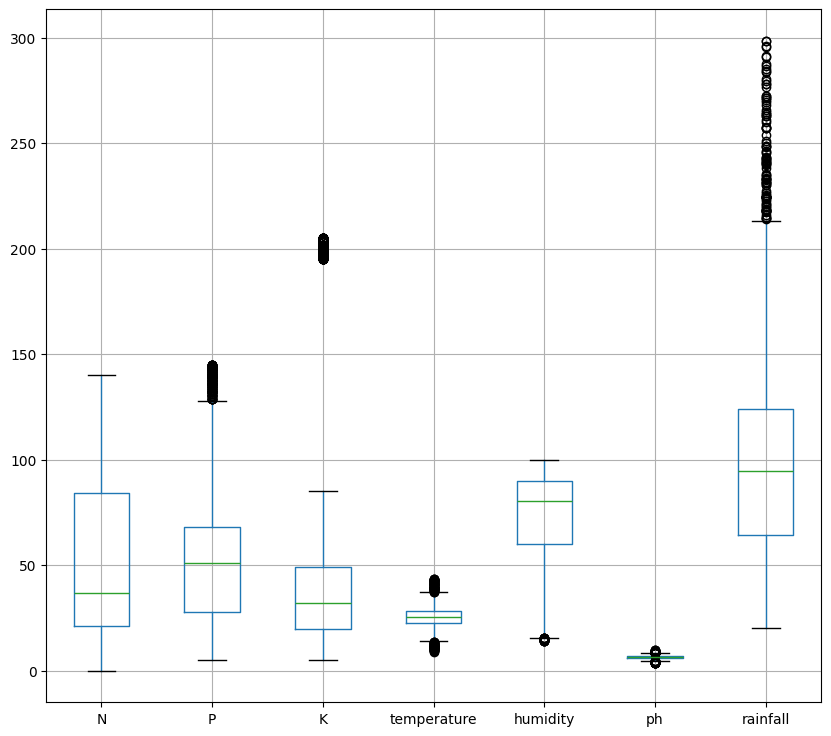

In [8]:
plt.figure(figsize=(10,9))
df.boxplot()
plt.show()

In [9]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation = numeric_cols.corr()
correlation


N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

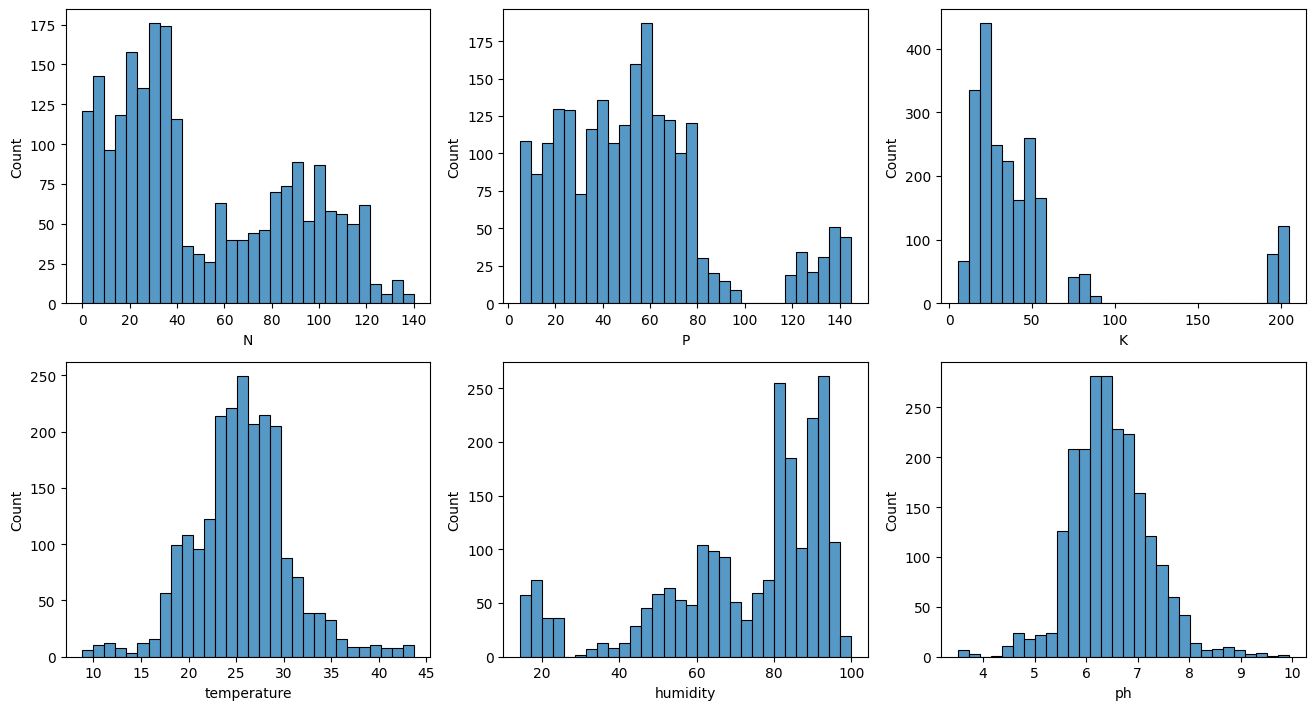

<Axes: xlabel='rainfall', ylabel='Count'>

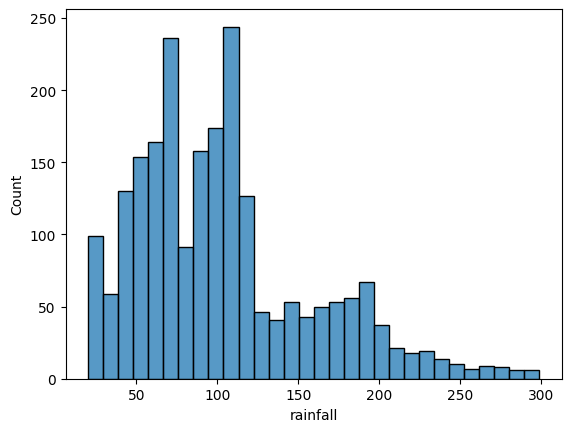

In [10]:
columns = df.columns[:-1]
plt.figure(figsize=(16,13))

i=1
for col in columns[:-1]:
  plt.subplot(3,3,i)
  sns.histplot(df[col], bins=30)
  i+=1
plt.show()

sns.histplot(df[columns[-1]],bins=30)

<Axes: ylabel='Count'>

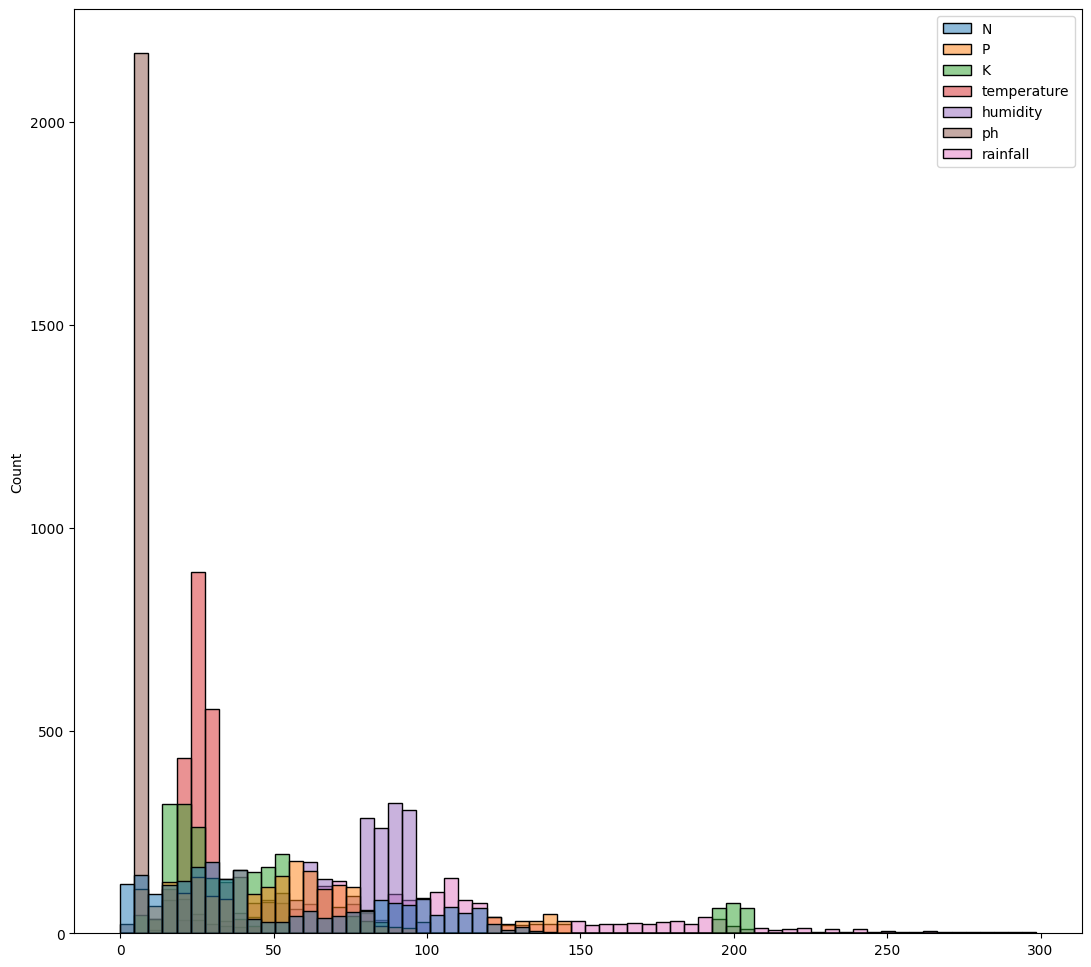

In [11]:
plt.figure(figsize=(13,12))
sns.histplot(df[columns])

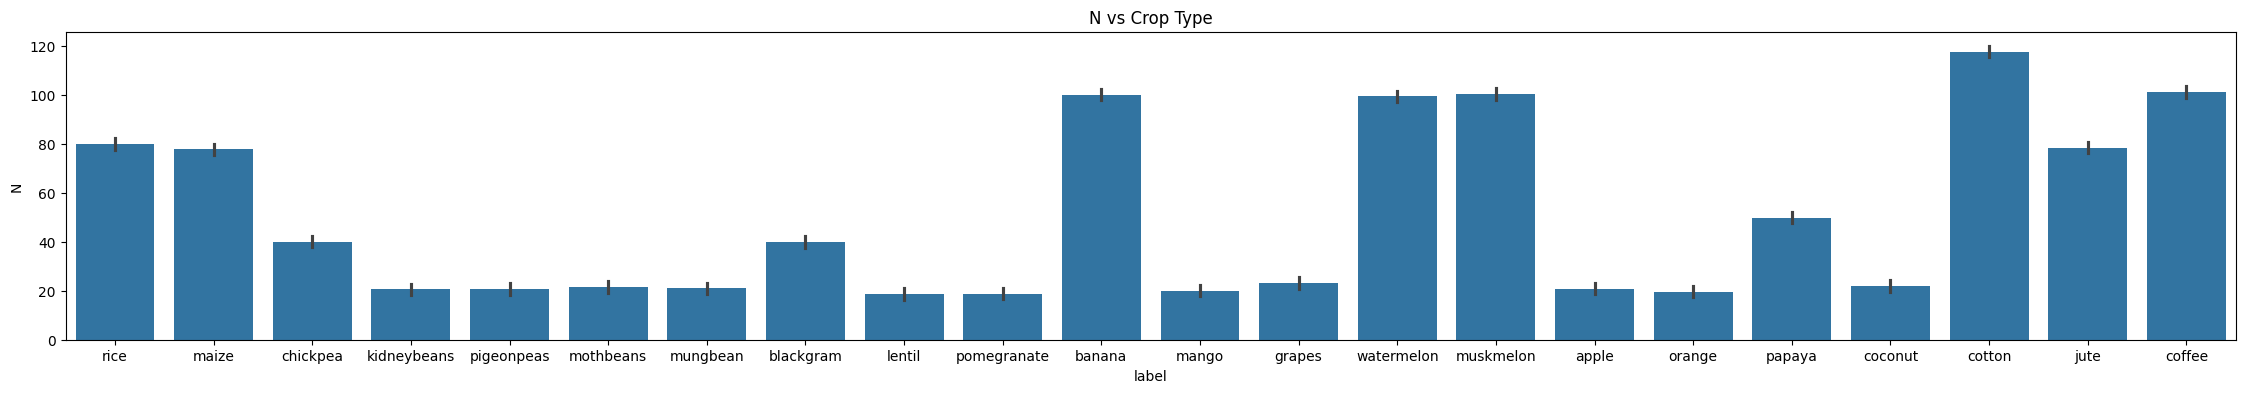

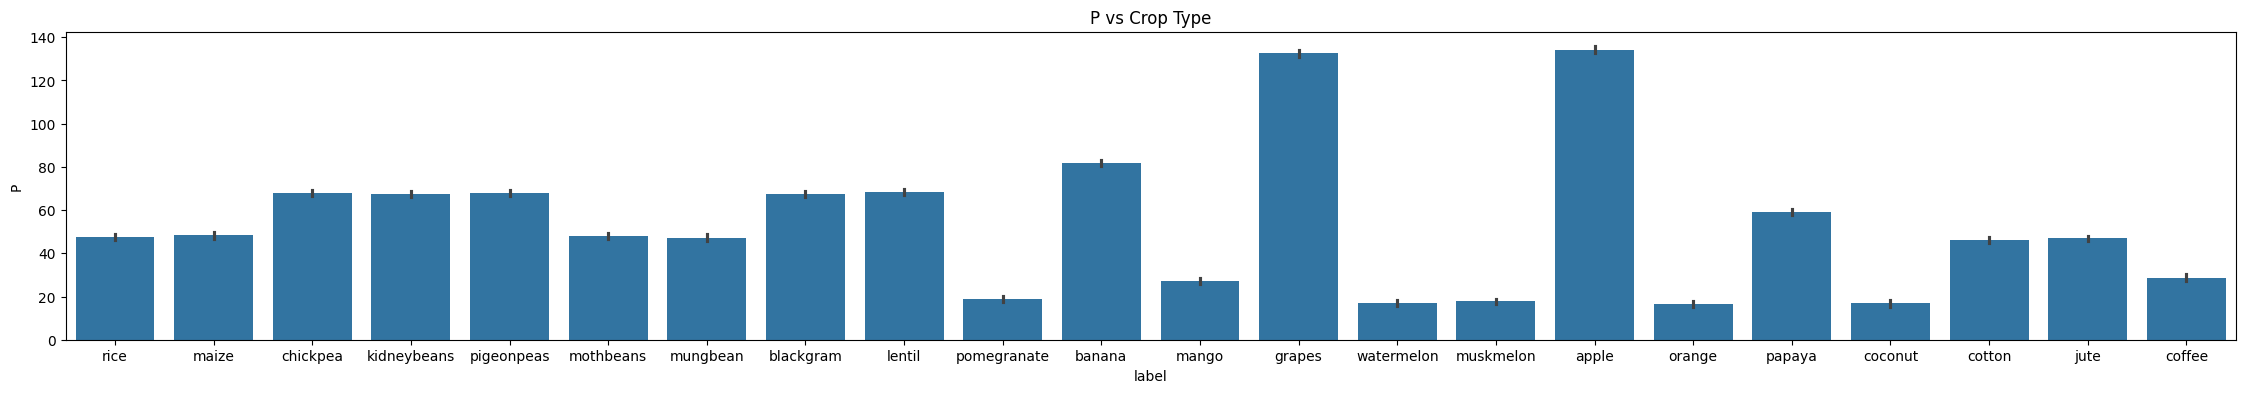

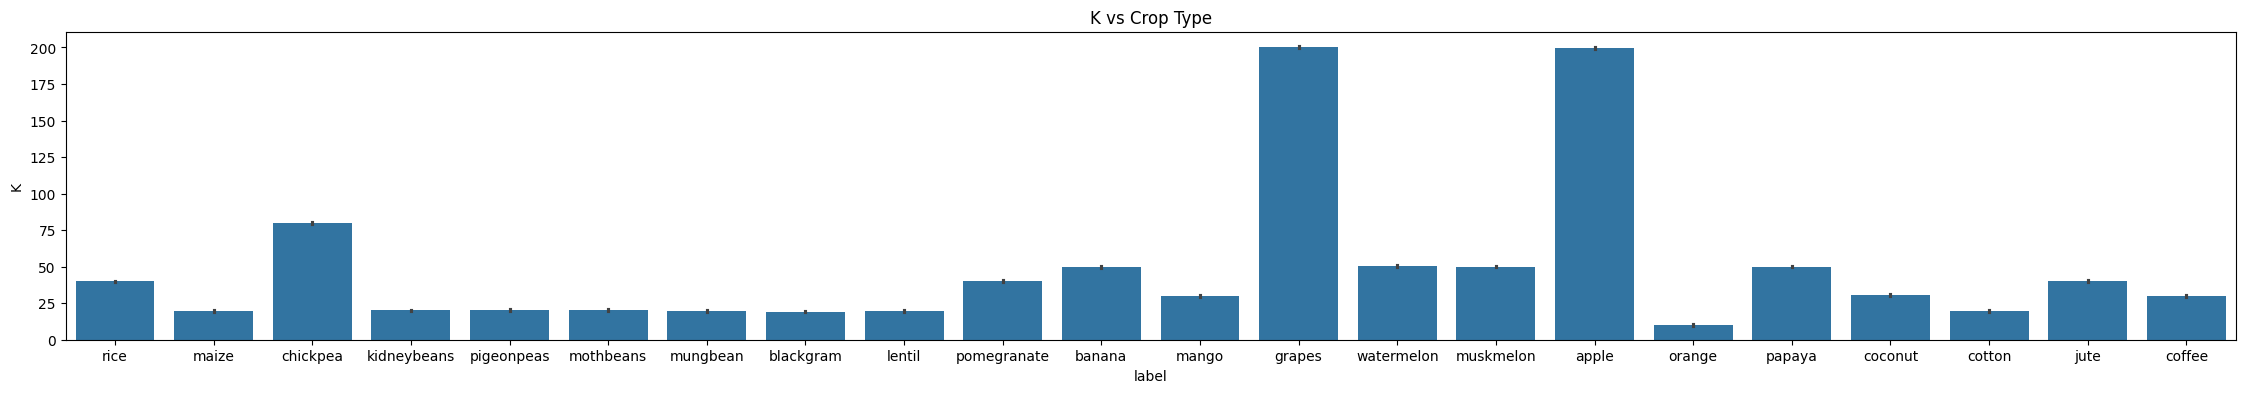

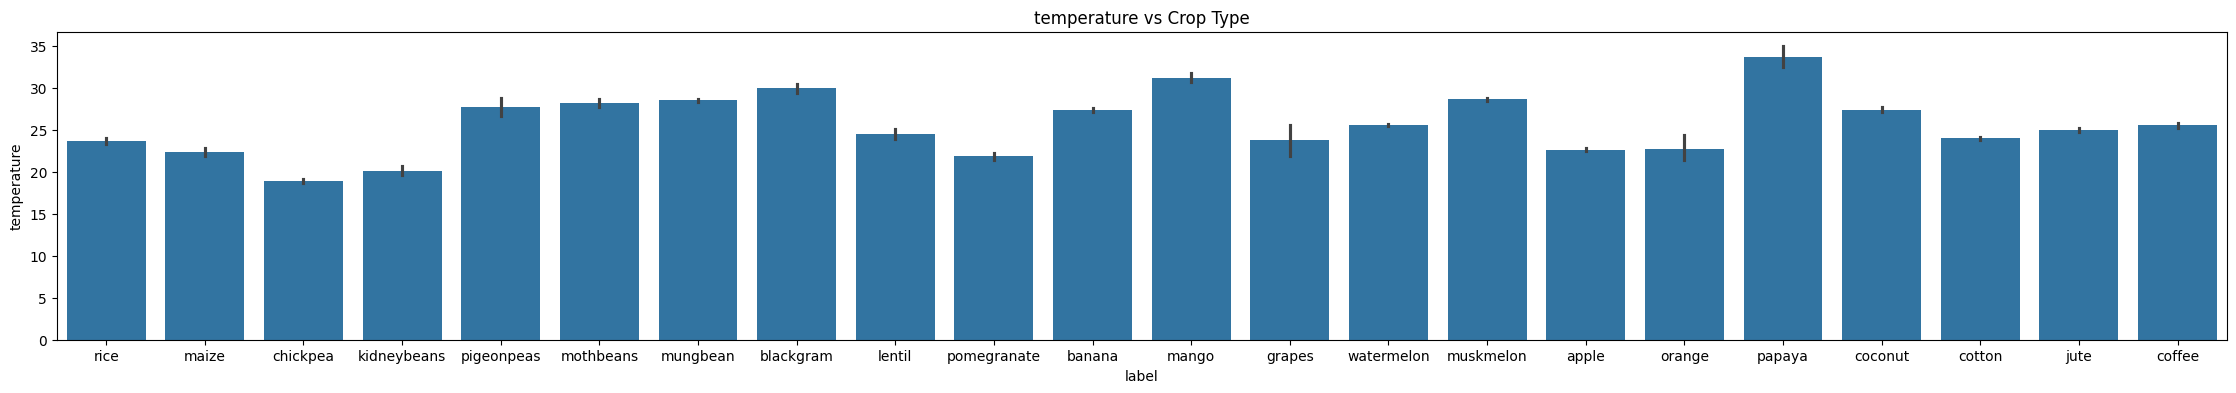

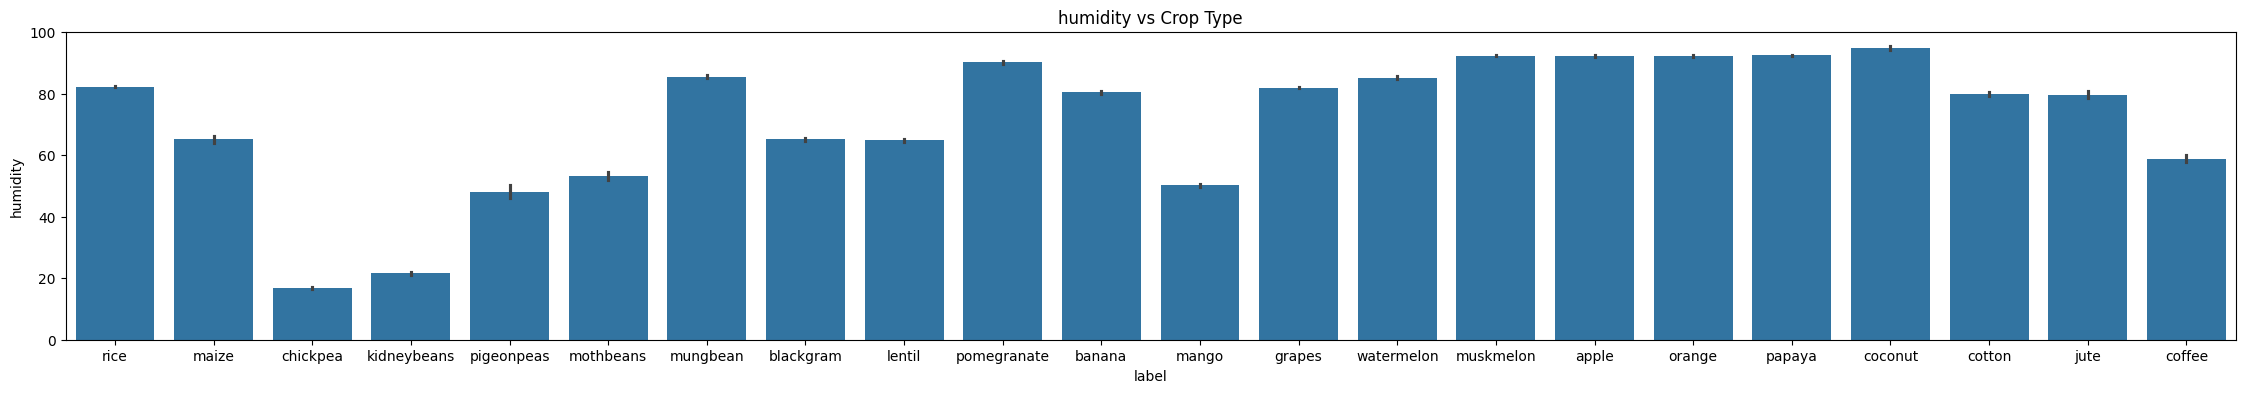

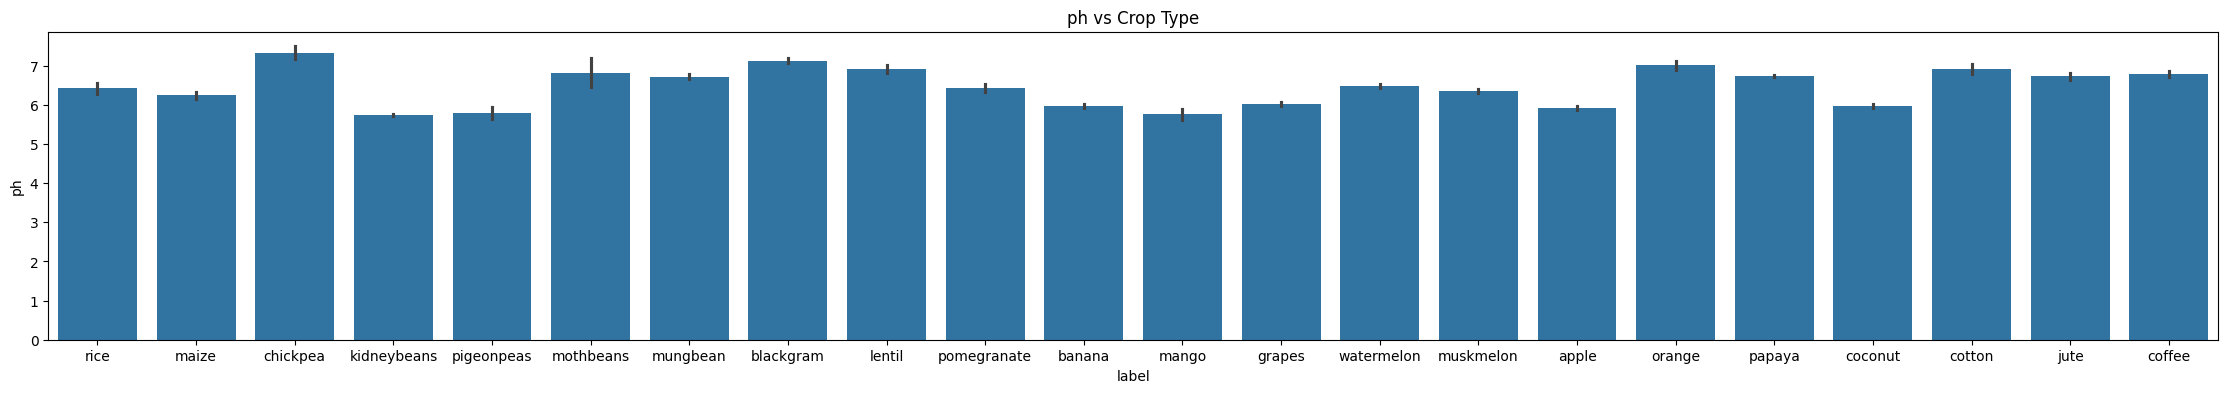

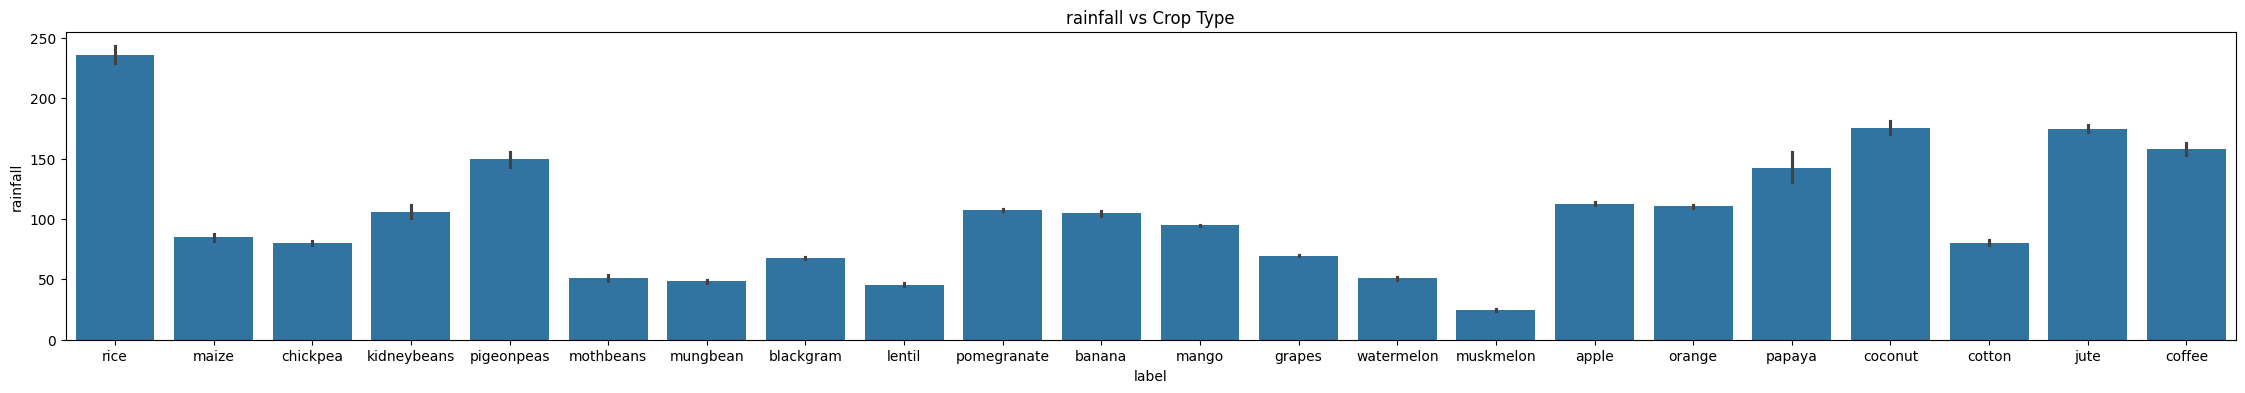

In [12]:
for col in columns:
  plt.figure(figsize=(28,4))
  sns.barplot(x="label",y=col, data=df)
  plt.title(f"{col} vs Crop Type")
  plt.show()

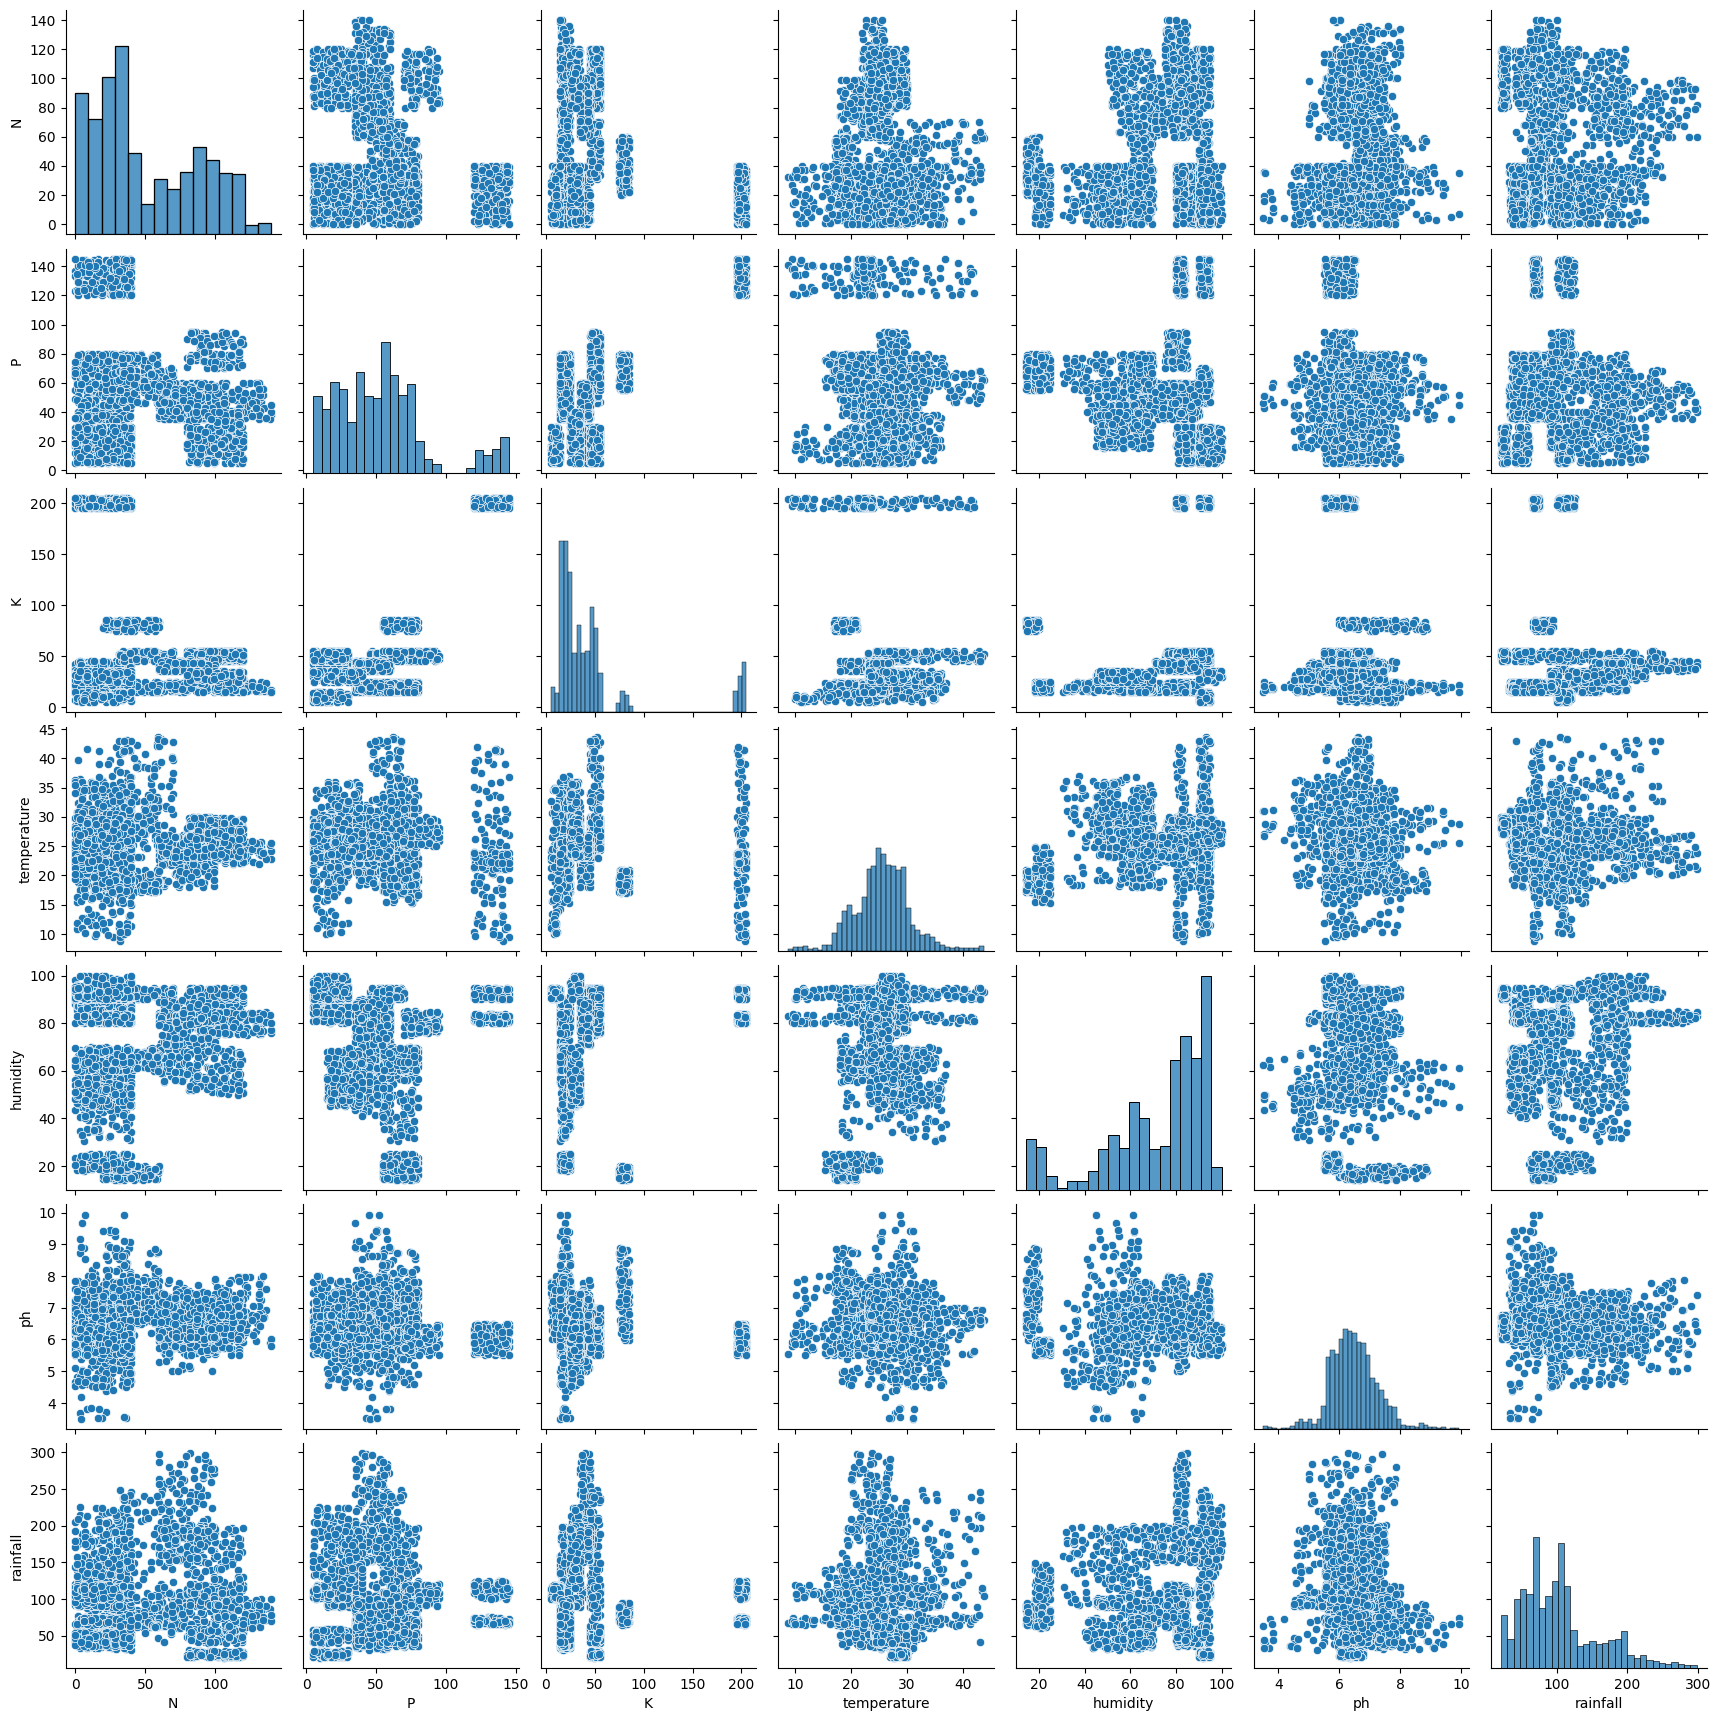

In [13]:
sns.pairplot(df)

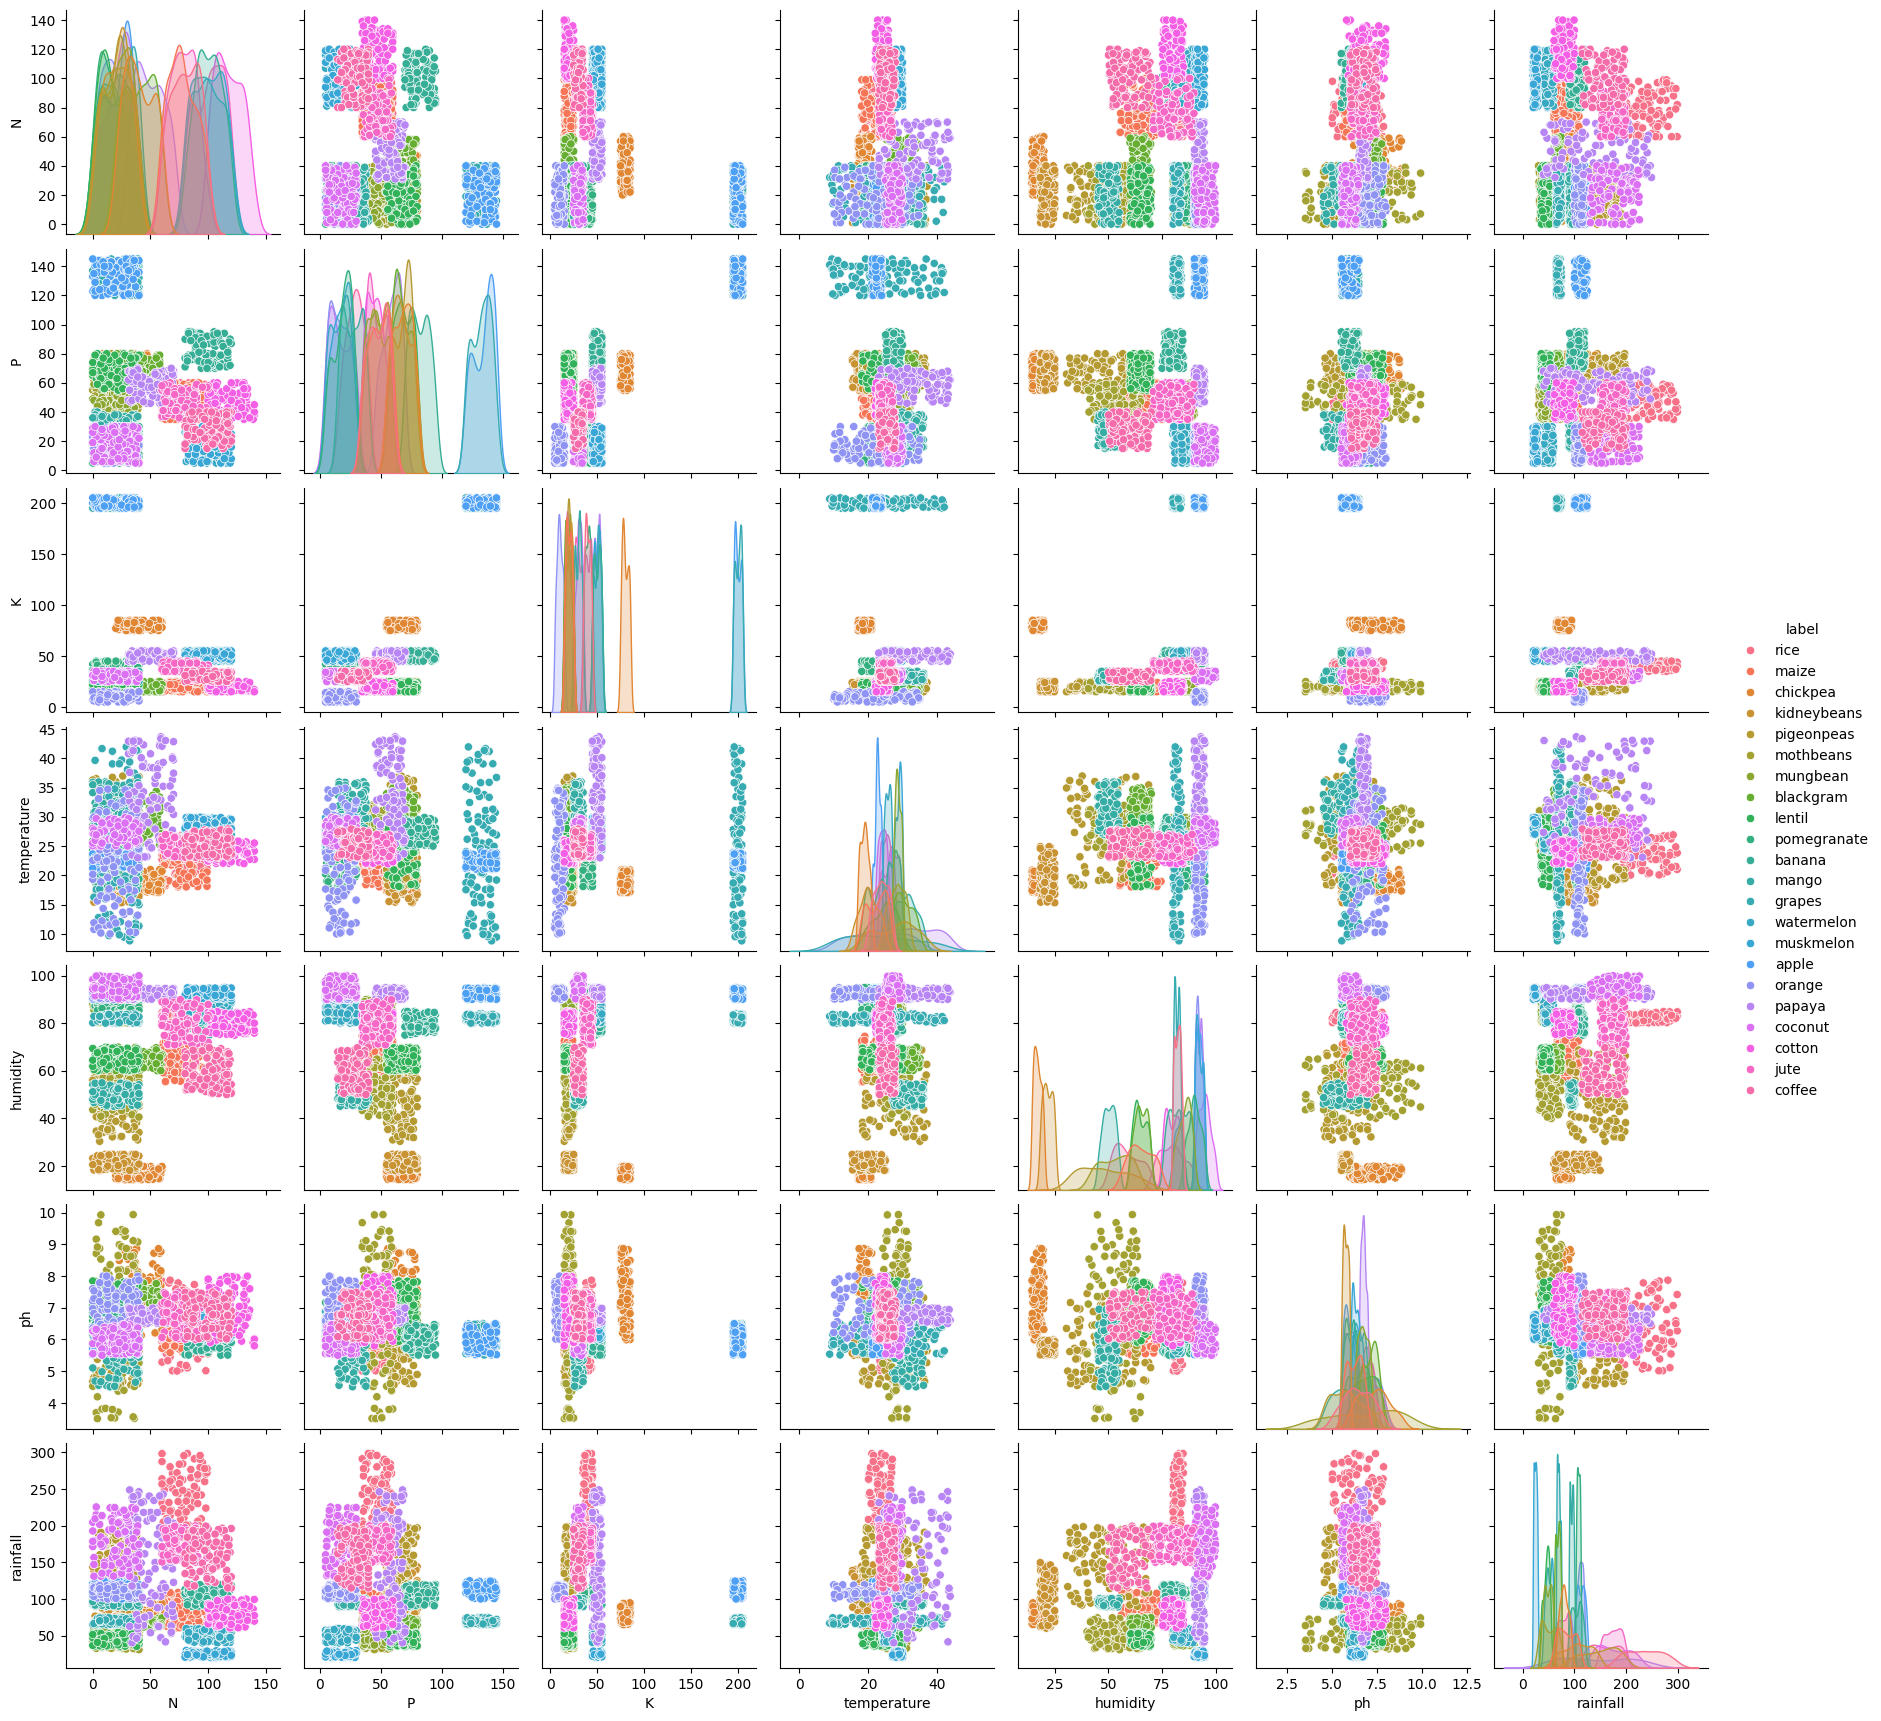

In [14]:
sns.pairplot(df,hue='label')

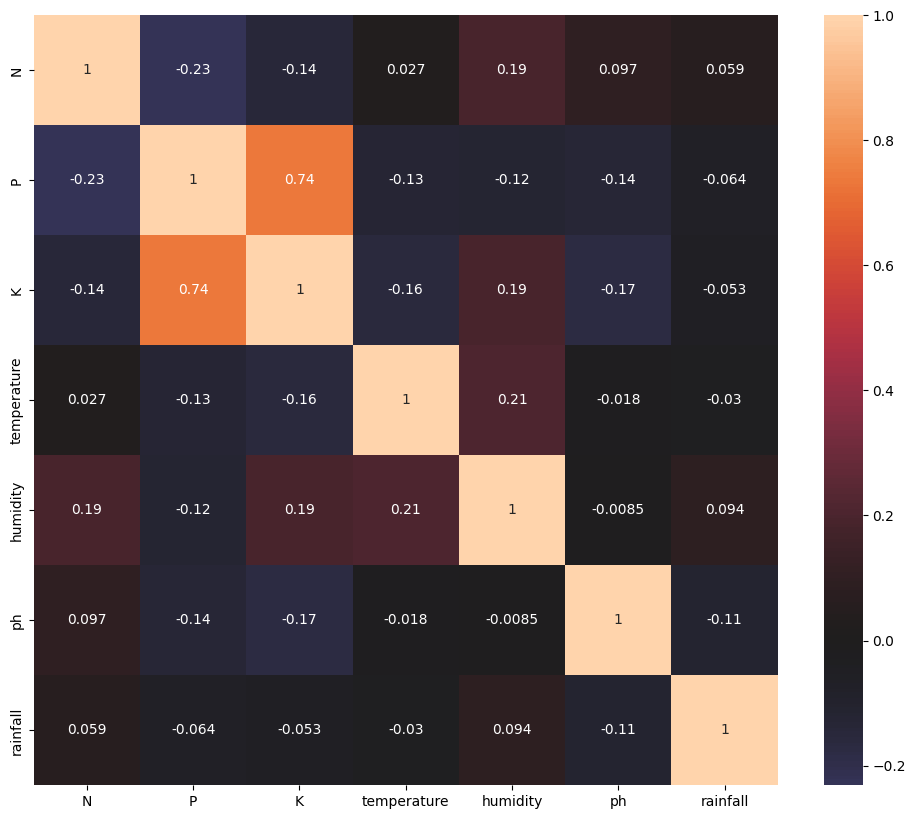

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, center=0)
plt.show()

<Axes: >

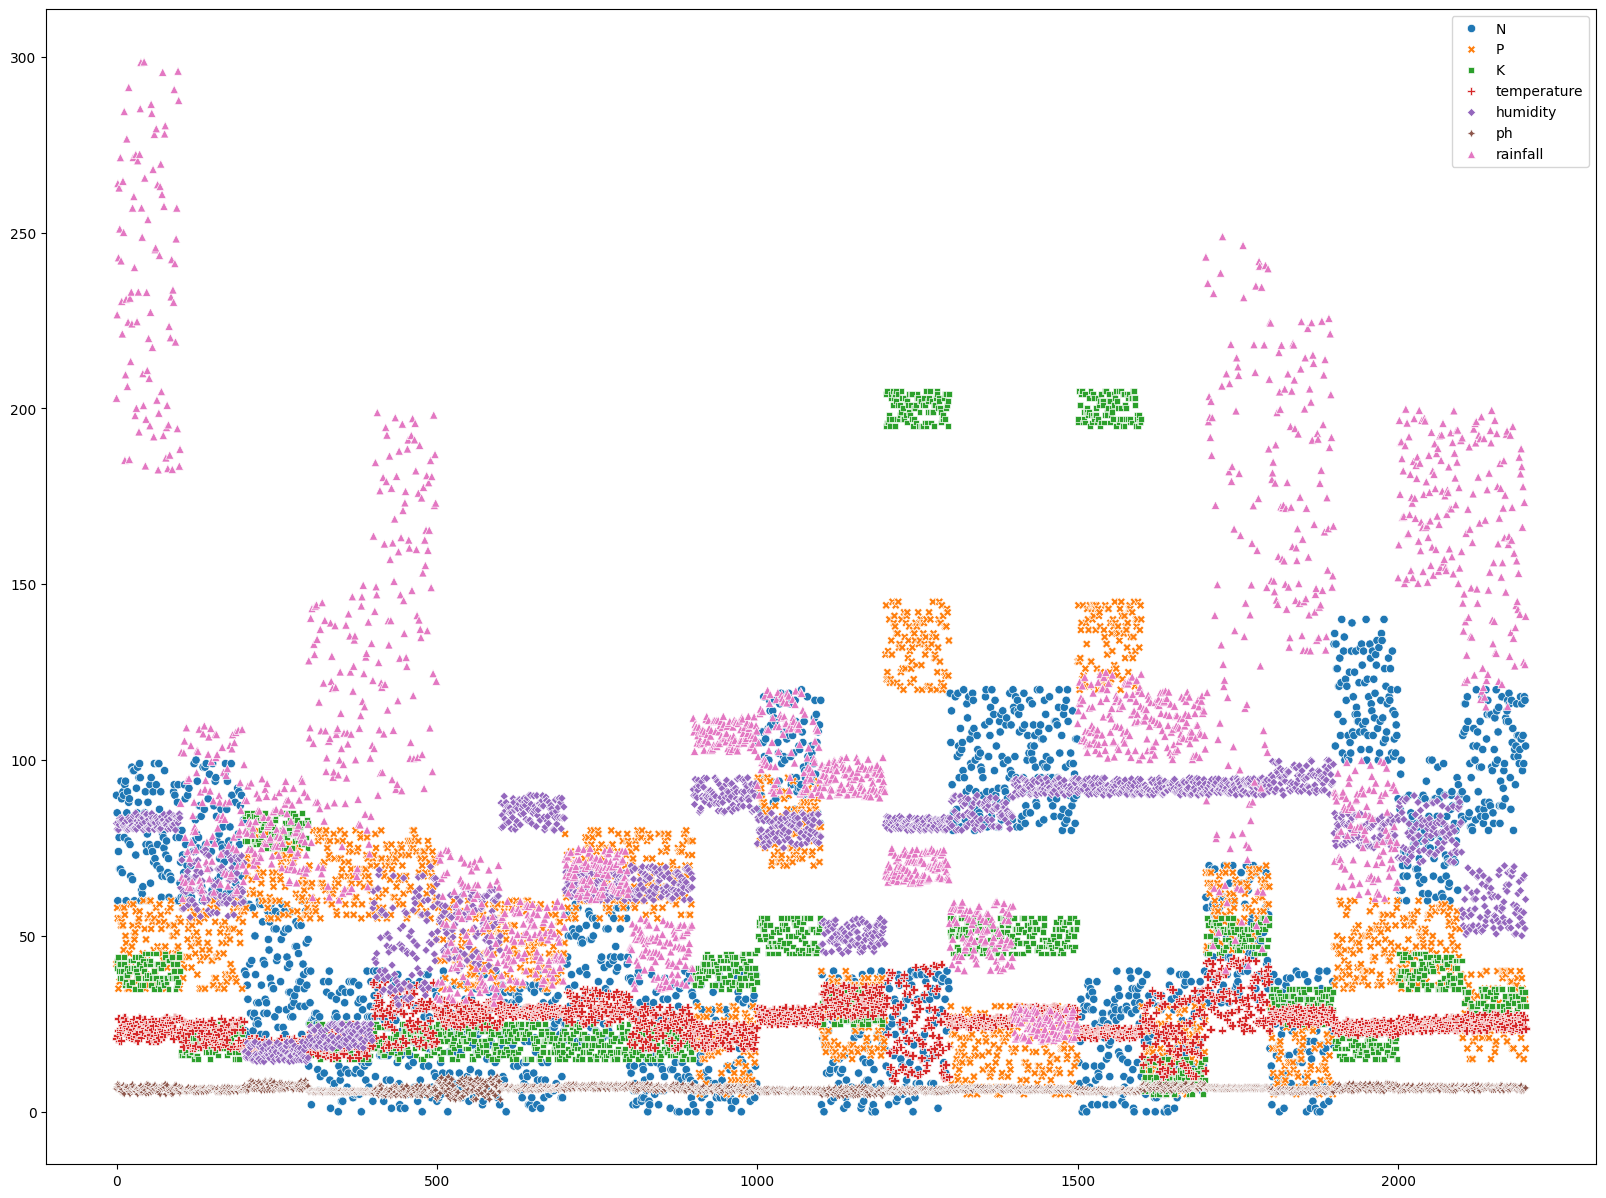

In [16]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df)

In [17]:
x = df['label'].value_counts().to_dict()

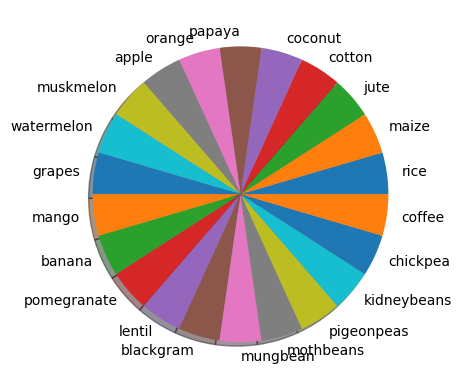

In [18]:
x_v = list(x.values())
x_k = list(x.keys())
plt.pie(x_v, labels=x_k, shadow=True)
plt.show()

In [19]:
labels = df['label'].unique()

In [20]:
labeled_data = {}
j=0
for i in labels:
  labeled_data[i] = j
  j+=1

In [21]:
print(labeled_data)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [22]:
label_values = list(labeled_data.values())

In [23]:
print(labels)
print("\n\n")
print(label_values)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [24]:
labels

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [25]:
df['label_encoded'] = df.label.map(labeled_data)

In [26]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   label_encoded  
0              0  
1              0  
2              0  
3              0  
4              0

In [27]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  label_encoded  
count  2200.000000  2200.000000    2200.000000  
mean      6.469480   103.463655      10.500000  
std       0.773938    54.958389       6.345731  
min       3.504752    20.211267       0.000000  
25%       5.971693    64.551686       5.000000  
50%       6.425045    94.867624      10.500000  
75%       6.923643   124.267508      16.000000  
max       9.935091   298.560117      21.000000

In [28]:
X = df.drop(['label','label_encoded'],axis=1)
X.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

In [29]:
y = df['label_encoded']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label_encoded, dtype: int64

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [31]:
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
sc.mean_

array([ 50.39261364,  52.88238636,  47.23579545,  25.58610532,
        71.20236431,   6.46069391, 104.99553826])

In [34]:
np.sqrt(sc.var_)

array([36.6511325 , 32.50093228, 49.19601994,  5.08611542, 22.50626072,
        0.78173883, 55.66283749])

In [35]:
X_train.shape

(1760, 7)

In [36]:
from sklearn.svm import SVC
from sklearn import metrics

In [37]:
SVM = SVC(gamma=5)

In [38]:
SVM.fit(X_train,y_train)

SVC(gamma=5)

In [39]:
predicted_train_val = SVM.predict(X_train)
m1 = metrics.accuracy_score(y_train,predicted_train_val)
print('Traning Accuracy of SVM Model:',m1)

Traning Accuracy of SVM Model: 0.9994318181818181


In [40]:
predicted_val = SVM.predict(X_test)
m2 = metrics.accuracy_score(y_test,predicted_val)
print('Testing Accuracy of SVM Model:',m2)

Testing Accuracy of SVM Model: 0.9454545454545454


In [41]:
train_accuracy['SVM Classifier'] = m1*100
test_accuracy['SVM Classifier'] = m2*100

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RF_model = RandomForestClassifier(n_estimators=2, random_state=0)

In [45]:
RF_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2, random_state=0)

In [46]:
predicted_RF_train = RF_model.predict(X_train)
b1 = metrics.accuracy_score(y_train,predicted_RF_train)
print('Training Accuracy of Random Forest Model:',b1)

Training Accuracy of Random Forest Model: 0.9823863636363637


In [47]:
predicted_RF_test = RF_model.predict(X_test)
b2 = metrics.accuracy_score(y_test,predicted_RF_test)
print("Testing Accuracy of Random Forest Model",b2)

Testing Accuracy of Random Forest Model 0.9590909090909091


In [48]:
train_accuracy['Random Forest Classifier'] = b1*100
test_accuracy['Random Forest Classifier'] = b2*100

ANN Model
Building the architecture of the ANN Model

In [49]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(28,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(64,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(28,input_shape=(7,), activation='relu'))
model.add(keras.layers.Dense(22,input_shape=(7,), activation='softmax'))

C:\Users\Latitude\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 28)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22)             │           638 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,538 (17.73 KB)

 Trainable params: 4,538 (17.73 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
history = model.fit(x=X_train, y = y_train,epochs=300,batch_size=50 )

Epoch 1/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0583 - loss: 3.0420       
Epoch 2/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.2765 - loss: 2.6055
Epoch 3/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5257 - loss: 1.9266 
Epoch 4/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.7478 - loss: 1.1400
Epoch 5/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8318 - loss: 0.6933 
Epoch 6/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8803 - loss: 0.5131 
Epoch 7/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9020 - loss: 0.3980
Epoch 8/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9101 - loss: 0.3320 
Epoch 9/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9347 - loss: 0.2833
Epoch 10/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9366 - loss: 0.2432 
Epoch 11/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.9462 - loss: 0.2235
Epoch 12/300
36/36 ━━━━━━━━━━━━━━━━━━━━ 0

In [53]:
test1 = sc.transform(np.array([[30,28,30,32,52,5,98]]))
pre1 = np.argmax(model.predict(test1))
print(labels[pre1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
mango


C:\Users\Latitude\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
test2 = sc.transform(np.array([[104, 18, 30, 24, 60, 7, 141]]))
pre2 = np.argmax(model.predict(test2))
print(labels[pre2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
coffee


C:\Users\Latitude\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
test2 = sc.transform(np.array([[74, 35, 40, 26, 80, 6, 242]]))
pre2 = np.argmax(model.predict(test2))
print(labels[pre2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
rice


C:\Users\Latitude\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [56]:
test2 = sc.transform(np.array([[30, 25, 31, 26, 98, 5, 208]]))
pre2 = np.argmax(model.predict(test2))
print(labels[pre2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
coconut


C:\Users\Latitude\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
eval = model.evaluate(X_test,y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9823 - loss: 0.0789


In [58]:
train_accuracy['ANN model'] = history.history['accuracy'][-1]*100
test_accuracy['ANN model'] = eval[-1]*100

In [59]:
train_accuracy

{'SVM Classifier': 99.94318181818181,
 'Random Forest Classifier': 98.23863636363637,
 'ANN model': 100.0}

In [60]:
test_accuracy

{'SVM Classifier': 94.54545454545455,
 'Random Forest Classifier': 95.9090909090909,
 'ANN model': 97.72727489471436}